<a href="https://colab.research.google.com/github/Sirfowahid/FFN/blob/master/FNN_intro2MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

In [ ]:
labels = data[:,0]
data = data[:,1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


In [ ]:
data.shape

(20000, 784)

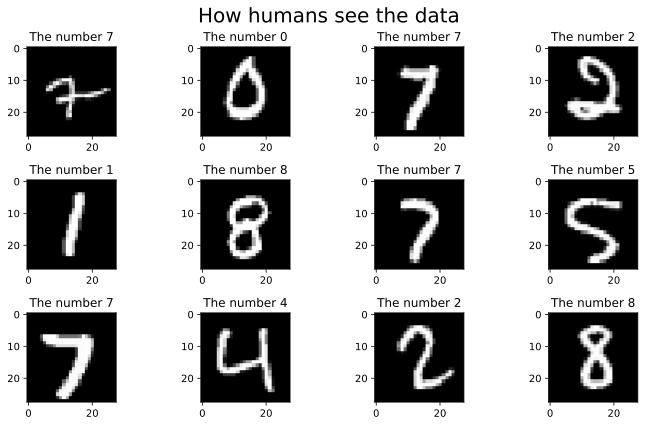

In [ ]:
from IPython.core.pylabtools import figsize
fig,axs = plt.subplots(3,4,figsize=(10,6))
for ax in axs.flatten():
  randomimg2show = np.random.randint(0,high=data.shape[0])

  img = np.reshape(data[randomimg2show,:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.set_title('The number %i'%labels[randomimg2show])
plt.suptitle('How humans see the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

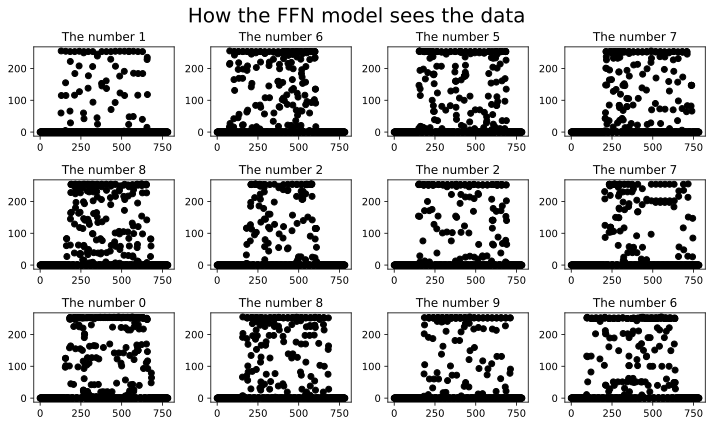

In [ ]:
fig,axs = plt.subplots(3,4,figsize=(10,6))
for ax in axs.flatten():
  randomimg2show = np.random.randint(0,high=data.shape[0])
  ax.plot(data[randomimg2show],'ko')
  ax.set_title('The number %i'%labels[randomimg2show])
plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

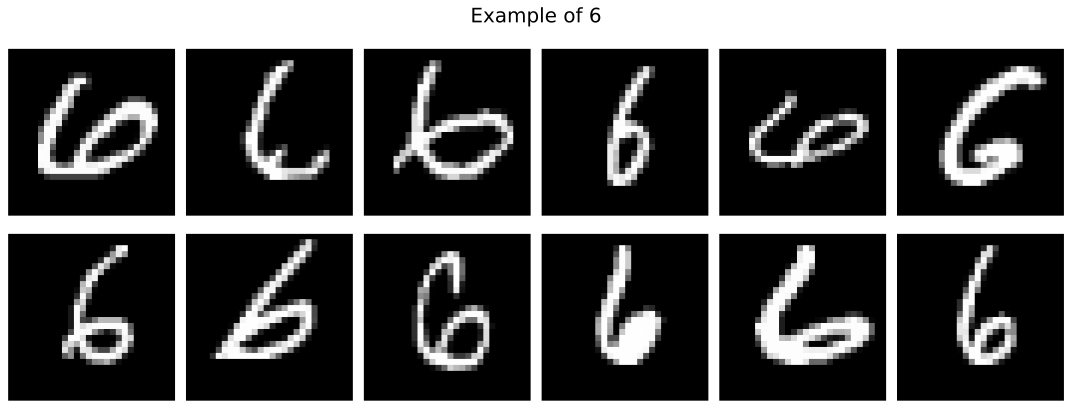

In [ ]:
the6s = np.where(labels==6)[0]
fig,axs = plt.subplots(2,6,figsize=(15,6))
for i,ax in enumerate(axs.flatten()):
  img = np.reshape(data[the6s[i],:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.axis('off')
plt.suptitle('Example of 6',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [ ]:
print(data[the6s,:].shape)

(2039, 784)


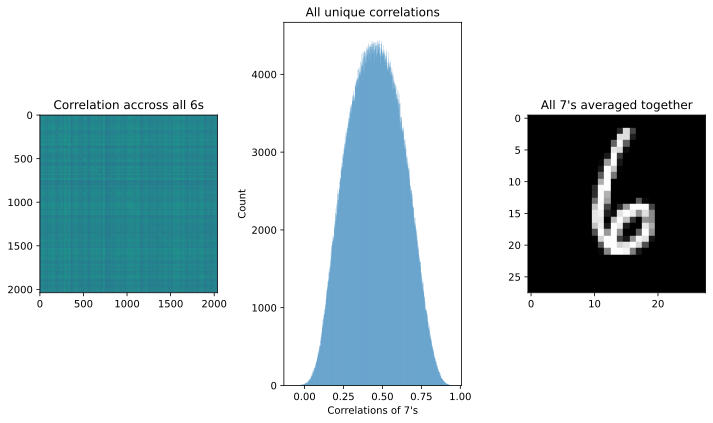

In [ ]:
C = np.corrcoef(data[the6s,:])

fig,ax = plt.subplots(1,3,figsize=(10,6))
ax[0].imshow(C,vmin=0,vmax=1)
ax[0].set_title('Correlation accross all 6s')

uniqueCs = np.triu(C,k=1).flatten()
ax[1].hist(uniqueCs[uniqueCs!=0],bins=1000)
ax[1].set_title('All unique correlations')
ax[1].set_xlabel("Correlations of 7's")
ax[1].set_ylabel('Count')

aveAll6s = np.reshape(np.mean(data[the6s,:],axis=0),(28,28))
ax[2].imshow(img,cmap='gray')
ax[2].set_title("All 7's averaged together")

plt.tight_layout()
plt.show()
